<a href="https://colab.research.google.com/github/npr99/PlanningMethods/blob/master/Google_Colab_and_Python_for_Statistical_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab and Python for Statistical Analyses

Major statistical software packages have procedures for the methods presented in Agresti (2018). This Google Colab Notebook (also called a Jupyter Notebook) discusses and illustrates the use of Python for these methods. We deal with basic use of the software rather than the great variety of options provided by the procedures. For ease of reference, the material is organized by chapter of presentation in this text. The full data files for most of the text examples and exercises are a vailable at:

http://users.stat.ufl.edu/~aa/smss/data/

Sections of this notebook are adapted from Agresit (2018) Appendix on Major Statitical Packages.

Agresti, A. (2018). Statistical Methods for the Social Sciences. 5th Edition. Upper Saddle River, NJ: Pearson, Inc.

## Introduction to Python

Python is a free software maintained and regularly updated by many volunteers. 

You can get help abut Python with many books tailored to implementing statistcal methods using Python and at many sites on the Internet, such as:

Lavanya Vijayan (2019) Python Quick Start. Available on LinkedIn Learning
https://www.linkedin.com/learning/python-quick-start/advance-your-career-with-python


### Python Packages

Many packages have been created to perform analyses in Python. Each package must be imported into Google Colab (Jupyter Notebook) in order to use commands available in the package.
A primary package required for working with datafiles is Pandas (https://pandas.pydata.org/)

The next block of code imports pandas as "pd". When you see "pd" in a code block Python is calling on the Pandas library of commands.

In [ ]:
import pandas as pd # For reading, writing and wrangling data

## Read in an Agresti (2018) data file
The next block of code reads a data file from the Agresti (2018) website.

Often one of the most challanging parts of working with data is getting the data into the statistical software. Agresti (2018) presents an intersesting challange. The datafiles are in the .dat format. This format is basically a text file with the data seperated by whitespace.

The Pandas (pd) command read table (read_table) provides the tools needed to read in textfiles with whitespace. This is a bit tricky (a [Google search resulted in a solution](https://stackoverflow.com/questions/16578573/python-pandas-with-large-disordered-text-files)). The seperator (sep) is set to \s+ which is a regular expression for "any amount of whitespace". 

The next codeblock will work for any of the .dat data files on the Agresti (2018) website. The command reads in the [Crime.dat](http://users.stat.ufl.edu/~aa/smss/data/Crime.dat) file, seperates the data values into three columns:

*   state = Two letter abbreviation for each state (AK = Alaska)
*   violent = Violent crime rate in the state
*   murder = Murder rate in the state

The datafile is stored in the Pandas dataframe called Crime.

The command Crime.head() provides a preview of the first 5 lines in the dataframe. Notice that for 

In [ ]:
# New version of python needs these lines to read webfiles
# Issue with security on reading content from web
# solution found at https://stackoverflow.com/questions/44629631/while-using-pandas-got-error-urlopen-error-ssl-certificate-verify-failed-cert
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
Crime = pd.read_table("http://users.stat.ufl.edu/~aa/smss/data/Crime.dat", sep="\s+")
Crime.head()

,state,violent,murder
0,AK,64,4.6
1,AL,43,7.2
2,AR,46,5.4
3,AZ,42,5.4
4,CA,40,4.6


## Chapter 2: Sampling and Measurement

On page 16, we showed how to select a simple random sample, to select four people from a population numbered 1 to 60.

In Python we will need the package `random` and the function `sample`.

In [ ]:
import random  
from random import sample 

In [ ]:
# Create a list from 1 to 60
list = [*range(1, 60)] 
print(list) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
# Randomly sample four people from the list 
random.sample(list, 4)

[15, 46, 12, 10]

## Chapter 3: Descriptive Statistics
After loading the data file Crime, here is how to request a historgram and a box plot for the violent crime rates in Table 3.2.

### Histogram and Boxplots

For help with how to make a histogram I Googled "python historgram" and found this link to be helpful: https://datatofish.com/plot-histogram-python/

For help with how to make a boxplot I Googled "matplotlib boxplot" and found this link to be helpful: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/"

To make a histogram and boxplots the package matplotlib needs to be imported.

In [ ]:
import matplotlib.pyplot as plt

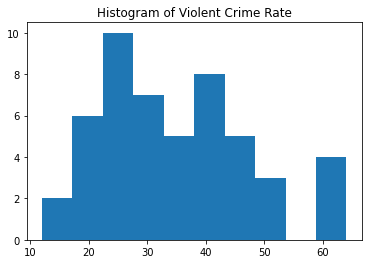

In [ ]:
plt.hist(Crime['violent'])
plt.title("Histogram of Violent Crime Rate")
plt.show()

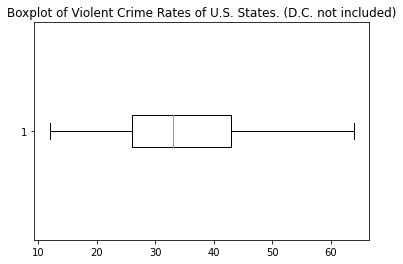

In [ ]:
plt.boxplot(Crime['violent'], vert=False)
plt.title("Boxplot of Violent Crime Rates of U.S. States. (D.C. not included)")
plt.show()

### Basic Descriptive Statistics

The `describe` function provides eight basic descriptive statistics. These include the count, the mean, the standard deviation (std), the minimum (min), the lower quartile (25%), the median (50%), the upper quartile (75%), and the maximum (max).

In [ ]:
Crime['violent'].describe()

count    50.000000
mean     34.900000
std      12.436369
min      12.000000
25%      26.000000
50%      33.000000
75%      43.000000
max      64.000000
Name: violent, dtype: float64

You can also get the mean and standard deviation with the `mean` and `std` functions.

In [ ]:
Crime['violent'].mean()

34.9

In [ ]:
Crime['violent'].std()

12.436368654318771

### Percentiles

You can obtain percentiles using the `quantile` pandas function, such as for a variable `violent`.

In [ ]:
Crime['violent'].quantile([0.25, 0.50, 0.75])

0.25    26.0
0.50    33.0
0.75    43.0
Name: violent, dtype: float64

### Boxplot inlcuding D.C.
To include D.C. (which is an outlier) we will need to read in a new data file.

Notice that the count for the CrimeDC dataframe is 51 - 1 more than the Crime dataframe.

The boxplot for CrimeDC has an outlier.

In [ ]:
CrimeDC = pd.read_table("http://users.stat.ufl.edu/~aa/smss/data/Crime-DC.dat", sep="\s+")
CrimeDC.head()

,state,violent,murder
0,AK,64,4.6
1,AL,43,7.2
2,AR,46,5.4
3,AZ,42,5.4
4,CA,40,4.6


In [ ]:
CrimeDC['violent'].describe()

count     51.000000
mean      36.764706
std       18.135698
min       12.000000
25%       26.000000
50%       34.000000
75%       43.500000
max      130.000000
Name: violent, dtype: float64

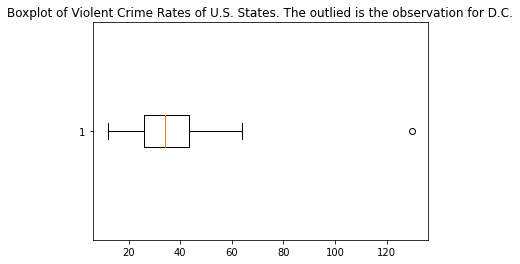

In [ ]:
plt.boxplot(CrimeDC['violent'], vert=False)
plt.title("Boxplot of Violent Crime Rates of U.S. States. The outlied is the observation for D.C.")
plt.show()

### Scatter Plots, Correlations, and Regression

You can construct scatterplots and find correlations and regression prediction equations using the following functions:

`scatter` from matplotlib

`corr` from pandas

`OLS` from the statsmodels package

For this example we will use the UN data file.


In [ ]:
UN = pd.read_table("http://users.stat.ufl.edu/~aa/smss/data/UN.dat", sep="\s+")
UN.head()

,Nation,GDP,HDI,GII,Fertility,C02,Homicide,Prison,Internet
0,Algeria,12.8,0.72,0.42,2.8,3.2,0.8,162,17
1,Argentina,14.7,0.81,0.38,2.2,4.7,5.5,147,60
2,Australia,42.3,0.93,0.11,1.9,16.5,1.1,130,83
3,Austria,43.1,0.88,0.06,1.4,7.8,0.8,98,81
4,Belgium,39.5,0.88,0.07,1.8,8.8,1.8,108,82


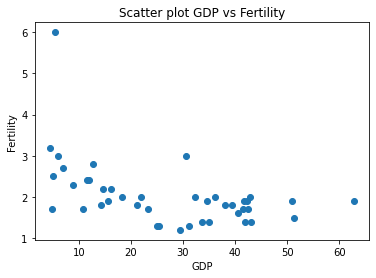

In [ ]:
# Scatter Plot
plt.scatter(UN['GDP'], UN['Fertility'])
plt.title('Scatter plot GDP vs Fertility')
plt.xlabel('GDP')
plt.ylabel('Fertility')
plt.show()

In [ ]:
# Correlation
UN[['GDP','Fertility']].corr()

,GDP,Fertility
GDP,1.000000,-0.486159
Fertility,-0.486159,1.000000


In [ ]:
# Correlation
UN[['GDP','Internet']].corr()

,GDP,Internet
GDP,1.000000,0.877199
Internet,0.877199,1.000000


In [ ]:
# Correlation
UN[['GDP','GII']].corr()

,GDP,GII
GDP,1.000000,-0.850669
GII,-0.850669,1.000000


In [ ]:
# Regression Prediction
from sklearn.linear_model import LinearRegression

# Data must be reshaped to work with the Linear Regression Model
x = UN['GDP'].values.reshape(-1,1)
y = UN['Fertility'].values.reshape(-1,1)

# Fit and summarize OLS model
model = LinearRegression()  
model.fit(x, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(model.intercept_)

[2.71401159]


In [ ]:
#For retrieving the slope:
print(model.coef_)

[[-0.02519166]]
